In [2]:
import matplotlib
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# This is called a magic and you can use to do magical things
# in this case allowing matplotlib to show in jupyter lab
%matplotlib inline
# %matplotlib widget

In [15]:
from pyswmm import Simulation, Nodes, Subcatchments, Links

In [6]:
# you can also execute linux shell commands starting with !
!ls example_projects/

 Example1.inp   Example1.rpt		        povas_example
 Example1.out  'PID pump control example.inp'   proposal_network.inp


In [8]:
try:
    sim = Simulation('example_projects/proposal_network.inp')
except:
    print("Couldn't load the simulation!")
else:
    print("Simulation is loaded.")
    sim.execute()

Simulation is loaded.

... SWMM Version 5.3.0.dev0
... Run Complete

In [149]:
count = 0
tank_total_volume = []
p1_flow = []
# pay attention to step count if it corresponds to 
with Simulation('example_projects/proposal_network.inp') as sim:
    
    
    sim.step_advance(300)
    print(sim.flow_units)
    print(sim.system_units)
    
    p1 = Links(sim)["P1"]
    tank1 = Nodes(sim)["Tanks1"]
    
    print("check if p1 is a pump:", p1.is_pump())
    print("check if tank1 is a storage unit:", tank1.is_storage())
    
    print(p1.inlet_node, p1.outlet_node)
    print(p1.__dir__())
    
    print("current_setting:", p1.current_setting)
    
    for idx, step in enumerate(sim):
        
#         print(sim.current_time)
        
        tank_total_volume.append(tank1.volume)
        
        #casadi
        
        p1_flow.append(p1.flow)
        
        if tank1.volume > 50:
#             print(p1.volume)
            p1.target_setting = 2
        count += 1
    print(count)

LPS
SI
check if p1 is a pump: True
check if tank1 is a storage unit: True
Tanks1 Out1
['_model', '_linkid', '__module__', '__doc__', '__init__', 'pump_statistics', 'linkid', 'is_conduit', 'is_pump', 'is_orifice', 'is_weir', 'is_outlet', 'connections', 'inlet_node', 'outlet_node', 'inlet_offset', 'outlet_offset', 'initial_flow', 'flow_limit', 'inlet_head_loss', 'outlet_head_loss', 'average_head_loss', 'seepage_rate', 'flow', 'depth', 'volume', 'froude', 'ups_xsection_area', 'ds_xsection_area', 'current_setting', 'target_setting', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
current_setting: 1.0
71


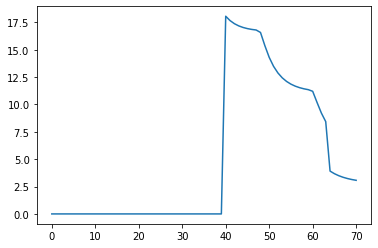

In [150]:
plt.plot(p1_flow)

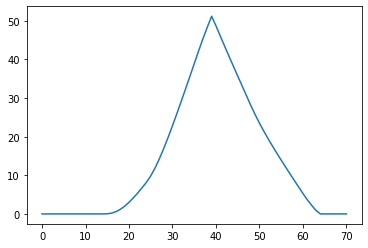

In [148]:

plt.plot(tank_total_volume)